<a href="https://colab.research.google.com/github/NicolasSocquetJuglard/TP4_ML/blob/main/codeNico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.utils import dataset_utils
from keras.utils import image_utils


In [2]:
import pathlib
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [5]:
#path toward the images

path = '/content/drive/MyDrive/Colab/cats_and_dogs'
path_train = path + '/train'
path_test = path + '/test'

In [6]:
train_datagen =  keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.15,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    preprocessing_function = preprocess_input,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        path_train,
        target_size = (300, 300),
        batch_size = 16,
        shuffle = True)

test_generator = test_datagen.flow_from_directory(
        path_test,
        target_size = (300, 300),
        batch_size = 16,
        shuffle = True)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [7]:
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (300, 300, 3))

In [8]:
#Freezing all layers

for layer in base_model.layers:
  layer.trainable = False

In [9]:
from keras.layers import Flatten
from keras.layers import Dense

x = base_model.output
x = Flatten()(x)
x = Dense(100, activation = 'relu')(x)
predictions = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x)

In [10]:
from keras.models import Model

#Building model
model = Model(inputs = base_model.input, outputs = predictions)

#Compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
hist = model.fit(x = train_generator, validation_data = test_generator, epochs = 2)

Epoch 1/4
35/35 [==============================] - 152s 4s/step - loss: 0.7194 - accuracy: 0.8959 - val_loss: 0.5707 - val_accuracy: 0.9643
Epoch 2/4
35/35 [==============================] - 141s 4s/step - loss: 0.3065 - accuracy: 0.9677 - val_loss: 0.3431 - val_accuracy: 0.9714
Epoch 3/4
35/35 [==============================] - 144s 4s/step - loss: 0.1288 - accuracy: 0.9785 - val_loss: 0.4125 - val_accuracy: 0.9500
Epoch 4/4
35/35 [==============================] - 140s 4s/step - loss: 0.0394 - accuracy: 0.9910 - val_loss: 0.5752 - val_accuracy: 0.9643


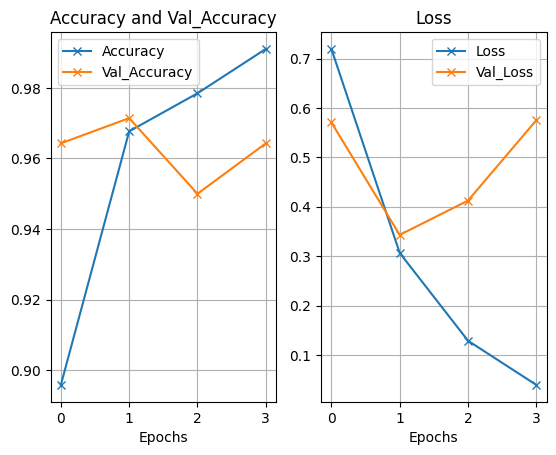

In [12]:
#Evaluating 

acc, val_acc = hist.history['accuracy'], hist.history['val_accuracy']
loss, val_loss = hist.history['loss'], hist.history['val_loss']

epochs = hist.epoch

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-x', label = 'Accuracy')
plt.plot(epochs, val_acc, '-x', label = 'Val_Accuracy')
plt.grid(True)
plt.title("Accuracy and Val_Accuracy")
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-x', label = 'Loss')
plt.plot(epochs, val_loss, '-x', label = 'Val_Loss')
plt.grid(True)
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()